In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/GENAI/Week4/archive.zip"

Archive:  /content/drive/MyDrive/GENAI/Week4/archive.zip
  inflating: train_u6lujuX_CVtuZ9i (1).csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display as Display

# **Étape 1 : Exploration et Compréhension des Données (EDA)**

In [5]:
file = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
df = pd.DataFrame(file)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(614, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.isna().mean() * 100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [11]:
from sklearn.impute import SimpleImputer

Si = SimpleImputer(strategy="most_frequent")
df["Gender"] = Si.fit_transform(df[["Gender"]])[:, 0]
df["Married"] = Si.fit_transform(df[["Married"]])[:, 0]
df["Dependents"] = Si.fit_transform(df[["Dependents"]])[:, 0]
df["Self_Employed"] = Si.fit_transform(df[["Self_Employed"]])[:, 0]
df["Credit_History"] = Si.fit_transform(df[["Credit_History"]])[:, 0]

Si2 = SimpleImputer(strategy="mean")
df["LoanAmount"] = Si2.fit_transform(df[["LoanAmount"]])[:, 0]
df["Loan_Amount_Term"] = Si2.fit_transform(df[["Loan_Amount_Term"]])[:, 0]

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


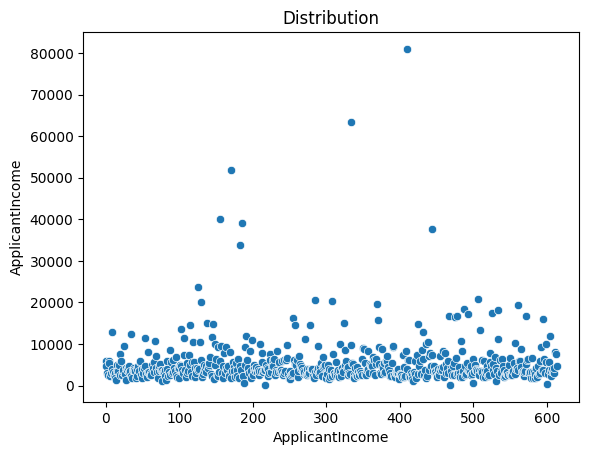

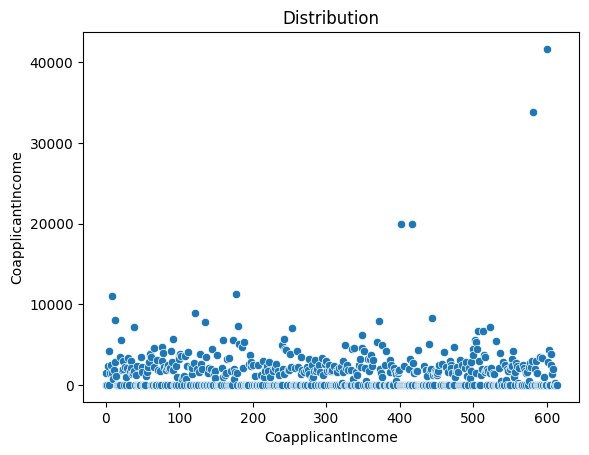

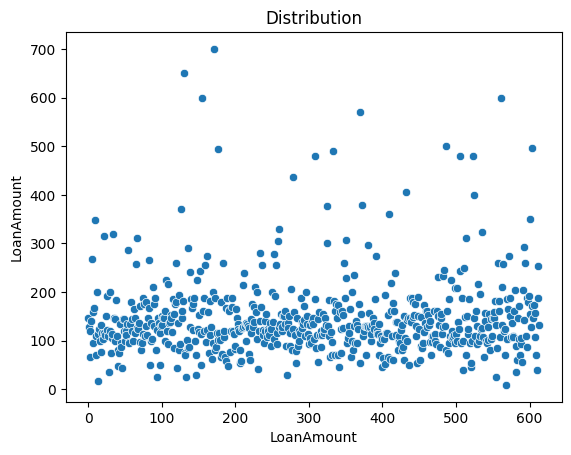

In [12]:
numericals = df.select_dtypes(include="number").columns

for col in numericals[0:-2] :
  sns.scatterplot(df[col])
  plt.title("Distribution")
  plt.xlabel(col)
  plt.show()

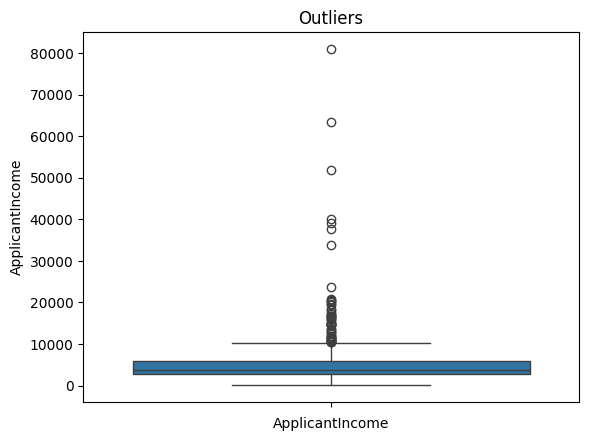

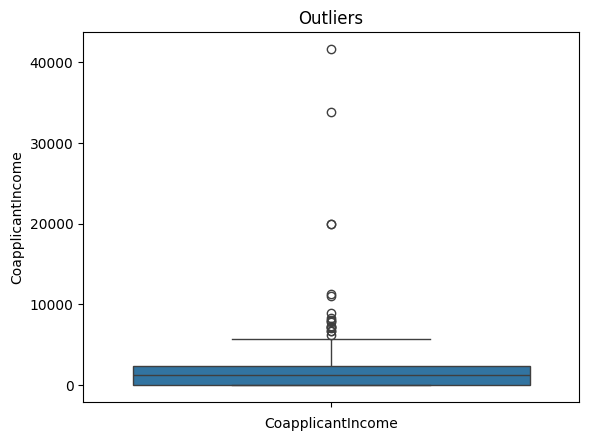

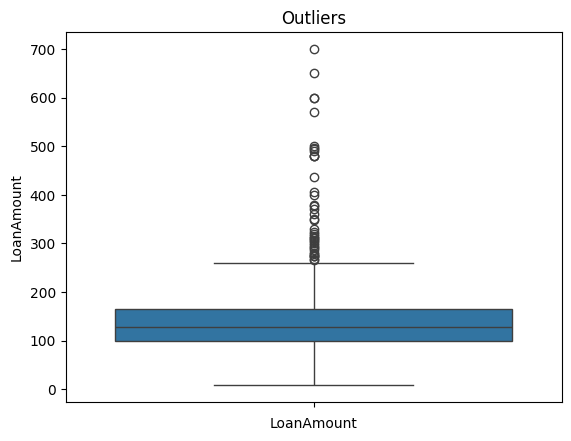

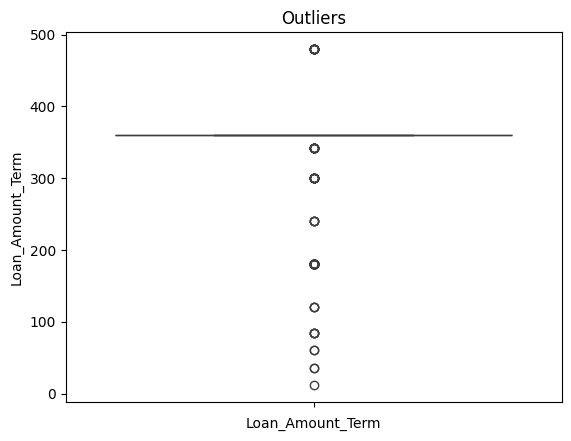

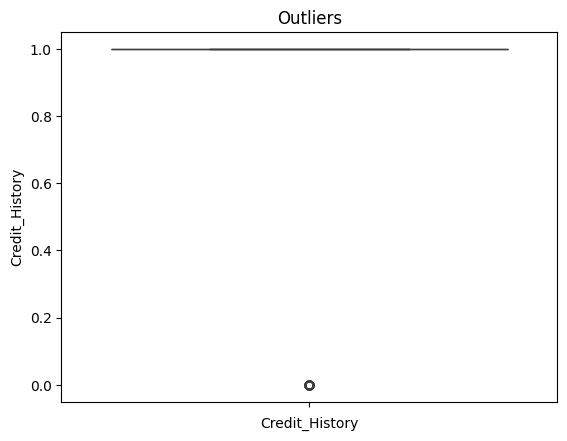

In [13]:
numericals = df.select_dtypes(include="number").columns

for col in numericals :
  sns.boxplot(df[col])
  plt.title("Outliers")
  plt.xlabel(col)
  plt.show()

In [14]:
for col in numericals :
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.000000,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.000000,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y


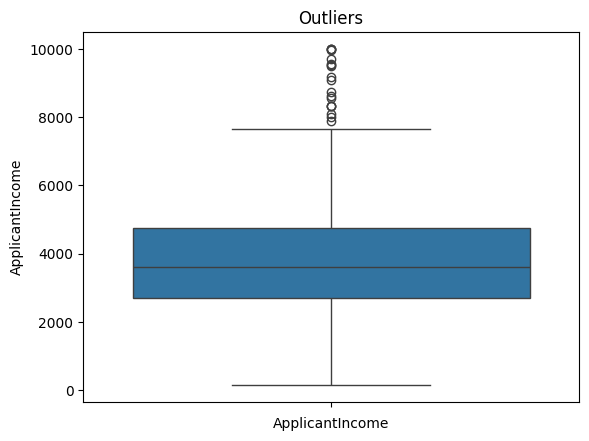

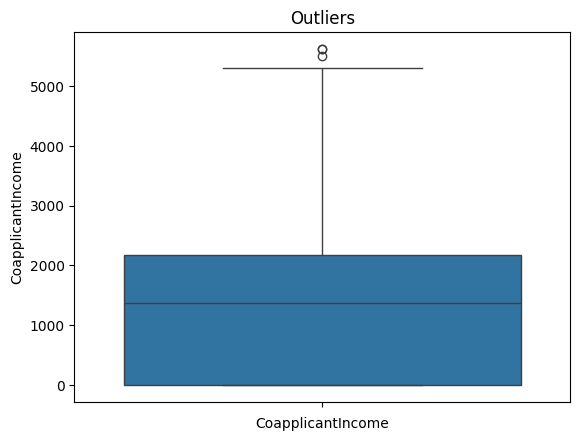

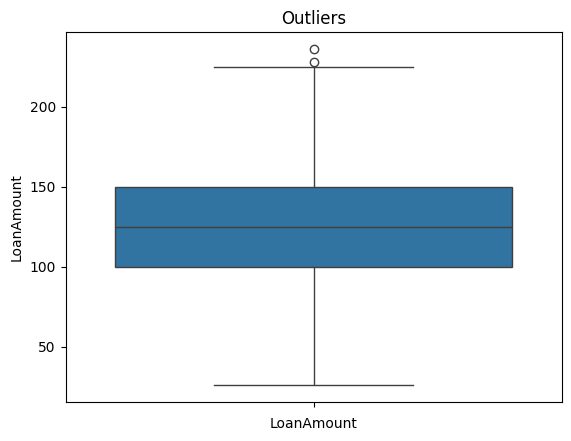

In [15]:
numericals = df.select_dtypes(include="number").columns

for col in numericals[0:-2] :
  sns.boxplot(df[col])
  plt.title("Outliers")
  plt.xlabel(col)
  plt.show()

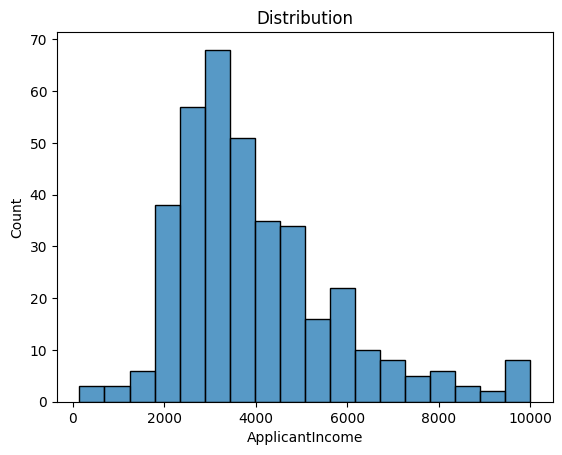

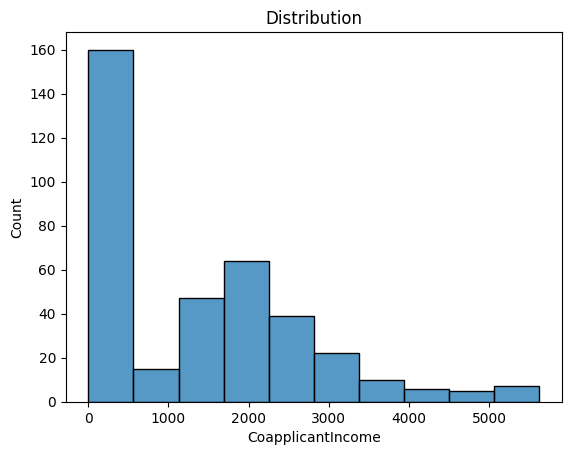

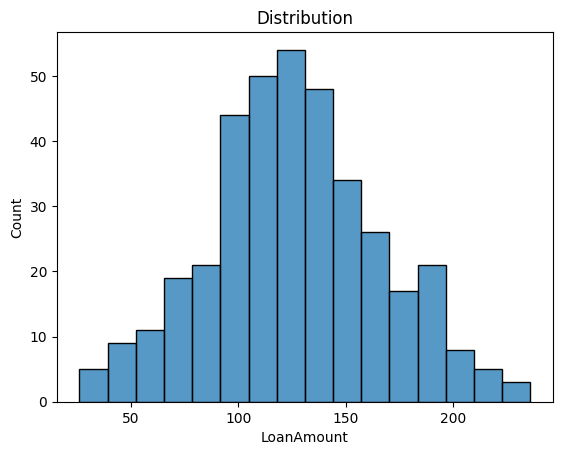

In [16]:
for col in numericals[:-2] :
  sns.histplot(df[col])
  plt.title("Distribution")
  plt.xlabel(col)
  plt.show()

In [17]:
df["Loan_Status"].value_counts()

,count
Loan_Status,
Y,305
N,70


305 personnes ont remboursées leur prêt et 70 ne l'ont pas fait

In [18]:
df["Loan_Status"] = df["Loan_Status"].map({"Y":1, "N":0})

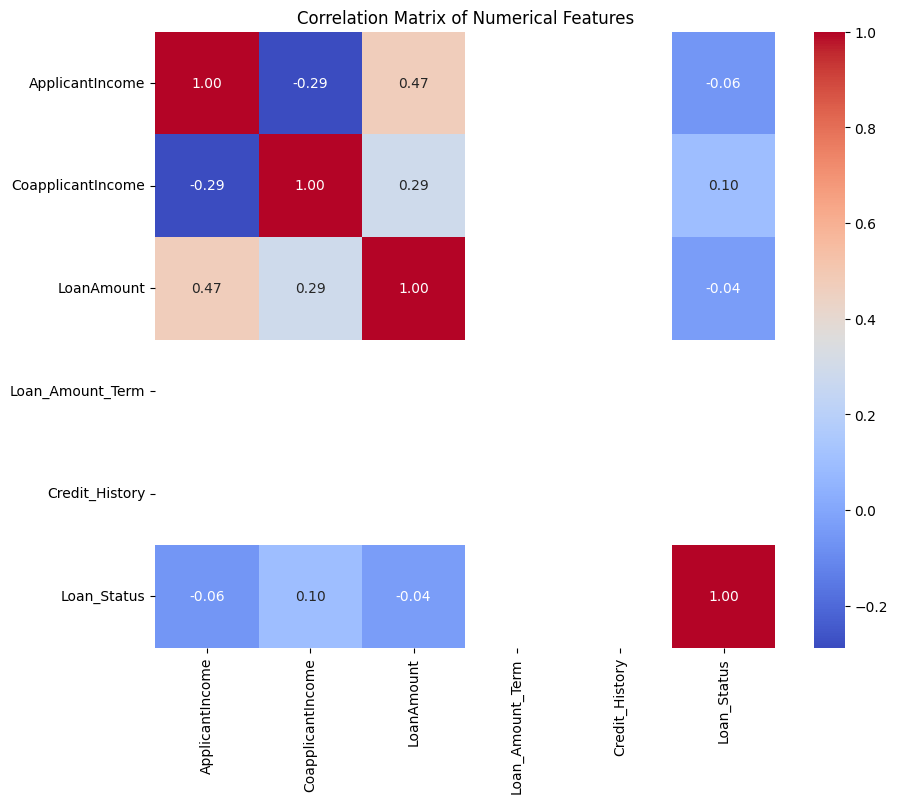

In [19]:
df_numerical = df.select_dtypes(include="number")
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Il ne semble pas avoir de corrélation entre l'age du client et sa capacité à rembourser un prêt.

# **Étape 2 : Préparation des Données et Entraînement des Modèles**


In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1




*   on supprime la colonne Loan_ID dans l'optique de mettre en place un algorithme qui prédira si oui ou non une personne est en capacité de rembourser son prêt car cette feature ne comporte pas de valeur prédictive.
*   On conserve le reste des colonnes car ce sont des features qui décrivent le profil du client et qui peuvent influencer sa capacité ou non a rembourser un prêt.


In [21]:
df.drop("Loan_ID", axis=1, inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             375 non-null    int64  
 1   Married            375 non-null    int64  
 2   Dependents         375 non-null    object 
 3   Education          375 non-null    int64  
 4   Self_Employed      375 non-null    int64  
 5   ApplicantIncome    375 non-null    int64  
 6   CoapplicantIncome  375 non-null    float64
 7   LoanAmount         375 non-null    float64
 8   Loan_Amount_Term   375 non-null    float64
 9   Credit_History     375 non-null    float64
 10  Property_Area      375 non-null    int64  
 11  Loan_Status        375 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 38.1+ KB


In [24]:
df["Dependents"] = df["Dependents"].replace("3+", 3)

In [25]:
df["Dependents"] = df["Dependents"].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             375 non-null    int64  
 1   Married            375 non-null    int64  
 2   Dependents         375 non-null    int64  
 3   Education          375 non-null    int64  
 4   Self_Employed      375 non-null    int64  
 5   ApplicantIncome    375 non-null    int64  
 6   CoapplicantIncome  375 non-null    float64
 7   LoanAmount         375 non-null    float64
 8   Loan_Amount_Term   375 non-null    float64
 9   Credit_History     375 non-null    float64
 10  Property_Area      375 non-null    int64  
 11  Loan_Status        375 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 38.1 KB


In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]

x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(x, y)

y_pred_rf = rf.predict(x_test)

In [38]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb = xgb.fit(x, y)

y_pred_xgb = xgb.predict(x_test)

In [40]:
from sklearn import svm

svm = svm.SVC()
svm = svm.fit(x, y)

y_pred_svm = svm.predict(x_test)

# **Étape 3 : Évaluation, Comparaison et Conclusion**

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [43]:
metrics = {
    "Accuracy" : [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_svm)],
    "Precision" : [precision_score(y_test, y_pred), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_svm)],
    "Recall" : [recall_score(y_test, y_pred), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_svm)],
    "F1 Score" : [f1_score(y_test, y_pred), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_svm)]
}

metrics = pd.DataFrame(metrics, index=["Decision Tree", "Random Forest", "XGBoost", "SVM"])
metrics

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.706667,0.920000,0.71875,0.807018
Random Forest,1.000000,1.000000,1.00000,1.000000
XGBoost,1.000000,1.000000,1.00000,1.000000
SVM,0.853333,0.853333,1.00000,0.920863


je recommenderai a la banque d'utiliser soit le random forest ou le xgboost dans le cadre de la mise en place de son algorithme de prévision de la capacité à rembourser un prêt bancaire, car ce sont ceux qui présente le recall le plus élevé qui est la métric la plus importante dans ce cas car il vaut mieux identifier tous les clients à risque, même si il a quelques faux positifs. De plus ils présentent aussi les scores les plus élevés pour le reste des métrics.